In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Assuming df is your dataframe and 'target' is the column name of the target variable
df = pd.read_csv('./data/prokaryotes_323columns.csv')
droplist = [0,1,2,3,4,5,6,7,8,10,11,12,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,33,38,43]
col = df.columns
dropl2 = []
""" for n in col:
    if len(n) == 2:
        dropl2.append(n) """
df = df.drop(df.columns[droplist], axis=1)
df = df.drop(dropl2, axis=1)
df['saltperaa'] = df['A_Salty'] / df['Length']
df = df.drop(['helixind','helixseq'],axis = 1)
df = df.reset_index(drop=True)
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df = df.fillna(0)
X = df.drop('meltPoint', axis=1)
y = df['meltPoint']

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train and evaluate the Gradient Boosting Regressor on the original data
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)

# Calculate performance metrics
mse_original = mean_squared_error(y_test, y_pred)
r2_original = r2_score(y_test, y_pred)

print(f"Original Data - MSE: {mse_original}, R2: {r2_original}")

# Apply PCA
pca = PCA(n_components=0.95)  # Retain 95% of the variance
X_pca = pca.fit_transform(X_scaled)

# Split PCA data into training and testing sets
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Train and evaluate the Gradient Boosting Regressor on the PCA-transformed data
gbr_pca = GradientBoostingRegressor()
gbr_pca.fit(X_train_pca, y_train_pca)
y_pred_pca = gbr_pca.predict(X_test_pca)

# Calculate performance metrics
mse_pca = mean_squared_error(y_test_pca, y_pred_pca)
r2_pca = r2_score(y_test_pca, y_pred_pca)

print(f"PCA Data - MSE: {mse_pca}, R2: {r2_pca}")

# Compare results
if mse_pca < mse_original:
    print("PCA improved the model's performance.")
else:
    print("PCA did not improve the model's performance.")


C:\Users\tobia\AppData\Local\Temp\ipykernel_9636\565201268.py:10: DtypeWarning: Columns (8,21,22,23,25,26,27,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./data/prokaryotes_323columns.csv')


Original Data - MSE: 71.30623330650567, R2: 0.7095792431224874
PCA Data - MSE: 67.70894667971456, R2: 0.724230510710376
PCA improved the model's performance.


In [4]:
""" import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import uniform, randint


# Assuming df is your dataframe and 'target' is the column name of the target variable
df = pd.read_csv('./data/prokaryotes_323columns.csv')
droplist = [0,1,2,3,4,5,6,7,8,10,11,12,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,33,38,43]
col = df.columns
dropl2 = []
for n in col:
    if len(n) == 2:
        dropl2.append(n)
df = df.drop(df.columns[droplist], axis=1)
df = df.drop(dropl2, axis=1)
df['saltperaa'] = df['A_Salty'] / df['Length']
df = df.drop(['helixind','helixseq'],axis = 1)
df = df.reset_index(drop=True)
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df = df.fillna(0)
X = df.drop('meltPoint', axis=1)
y = df['meltPoint']

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=0.95)  # Retain 95% of the variance
X_pca = pca.fit_transform(X_scaled)

# Split PCA data into training and testing sets
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Define the parameter distribution
param_dist = {
    'n_estimators': randint(50, 300),
    'learning_rate': uniform(0.01, 0.2),
    'max_depth': randint(3, 6),
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5),
    'subsample': uniform(0.8, 0.2)
}

# Initialize the Gradient Boosting Regressor
gbr = GradientBoostingRegressor()

# Initialize RandomizedSearchCV with 5-fold cross-validation
random_search = RandomizedSearchCV(estimator=gbr, param_distributions=param_dist, n_iter=2, cv=5, n_jobs=1, random_state=42, scoring='neg_mean_squared_error')

# Fit the random search to the data
random_search.fit(X_train_pca, y_train_pca)

# Get the best parameters and the best model
best_params = random_search.best_params_
best_gbr = random_search.best_estimator_

print(f"Best Parameters: {best_params}")

# Evaluate the best model on the test set
y_pred_pca_best = best_gbr.predict(X_test_pca)
mse_pca_best = mean_squared_error(y_test_pca, y_pred_pca_best)
r2_pca_best = r2_score(y_test_pca, y_pred_pca_best)

print(f"Tuned PCA Data - MSE: {mse_pca_best}, R2: {r2_pca_best}") """

' import pandas as pd\nimport numpy as np\nfrom sklearn.model_selection import train_test_split, RandomizedSearchCV\nfrom sklearn.ensemble import GradientBoostingRegressor\nfrom sklearn.decomposition import PCA\nfrom sklearn.preprocessing import StandardScaler\nfrom sklearn.metrics import mean_squared_error, r2_score\nfrom scipy.stats import uniform, randint\n\n\n# Assuming df is your dataframe and \'target\' is the column name of the target variable\ndf = pd.read_csv(\'./data/prokaryotes_323columns.csv\')\ndroplist = [0,1,2,3,4,5,6,7,8,10,11,12,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,33,38,43]\ncol = df.columns\ndropl2 = []\nfor n in col:\n    if len(n) == 2:\n        dropl2.append(n)\ndf = df.drop(df.columns[droplist], axis=1)\ndf = df.drop(dropl2, axis=1)\ndf[\'saltperaa\'] = df[\'A_Salty\'] / df[\'Length\']\ndf = df.drop([\'helixind\',\'helixseq\'],axis = 1)\ndf = df.reset_index(drop=True)\ndf.replace([np.inf, -np.inf], np.nan, inplace=True)\ndf = df.fillna(0)\nX = df

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
gbr.fit(X_train, y_train)

GradientBoostingRegressor()

In [9]:
len(gbr.feature_importances_)

295

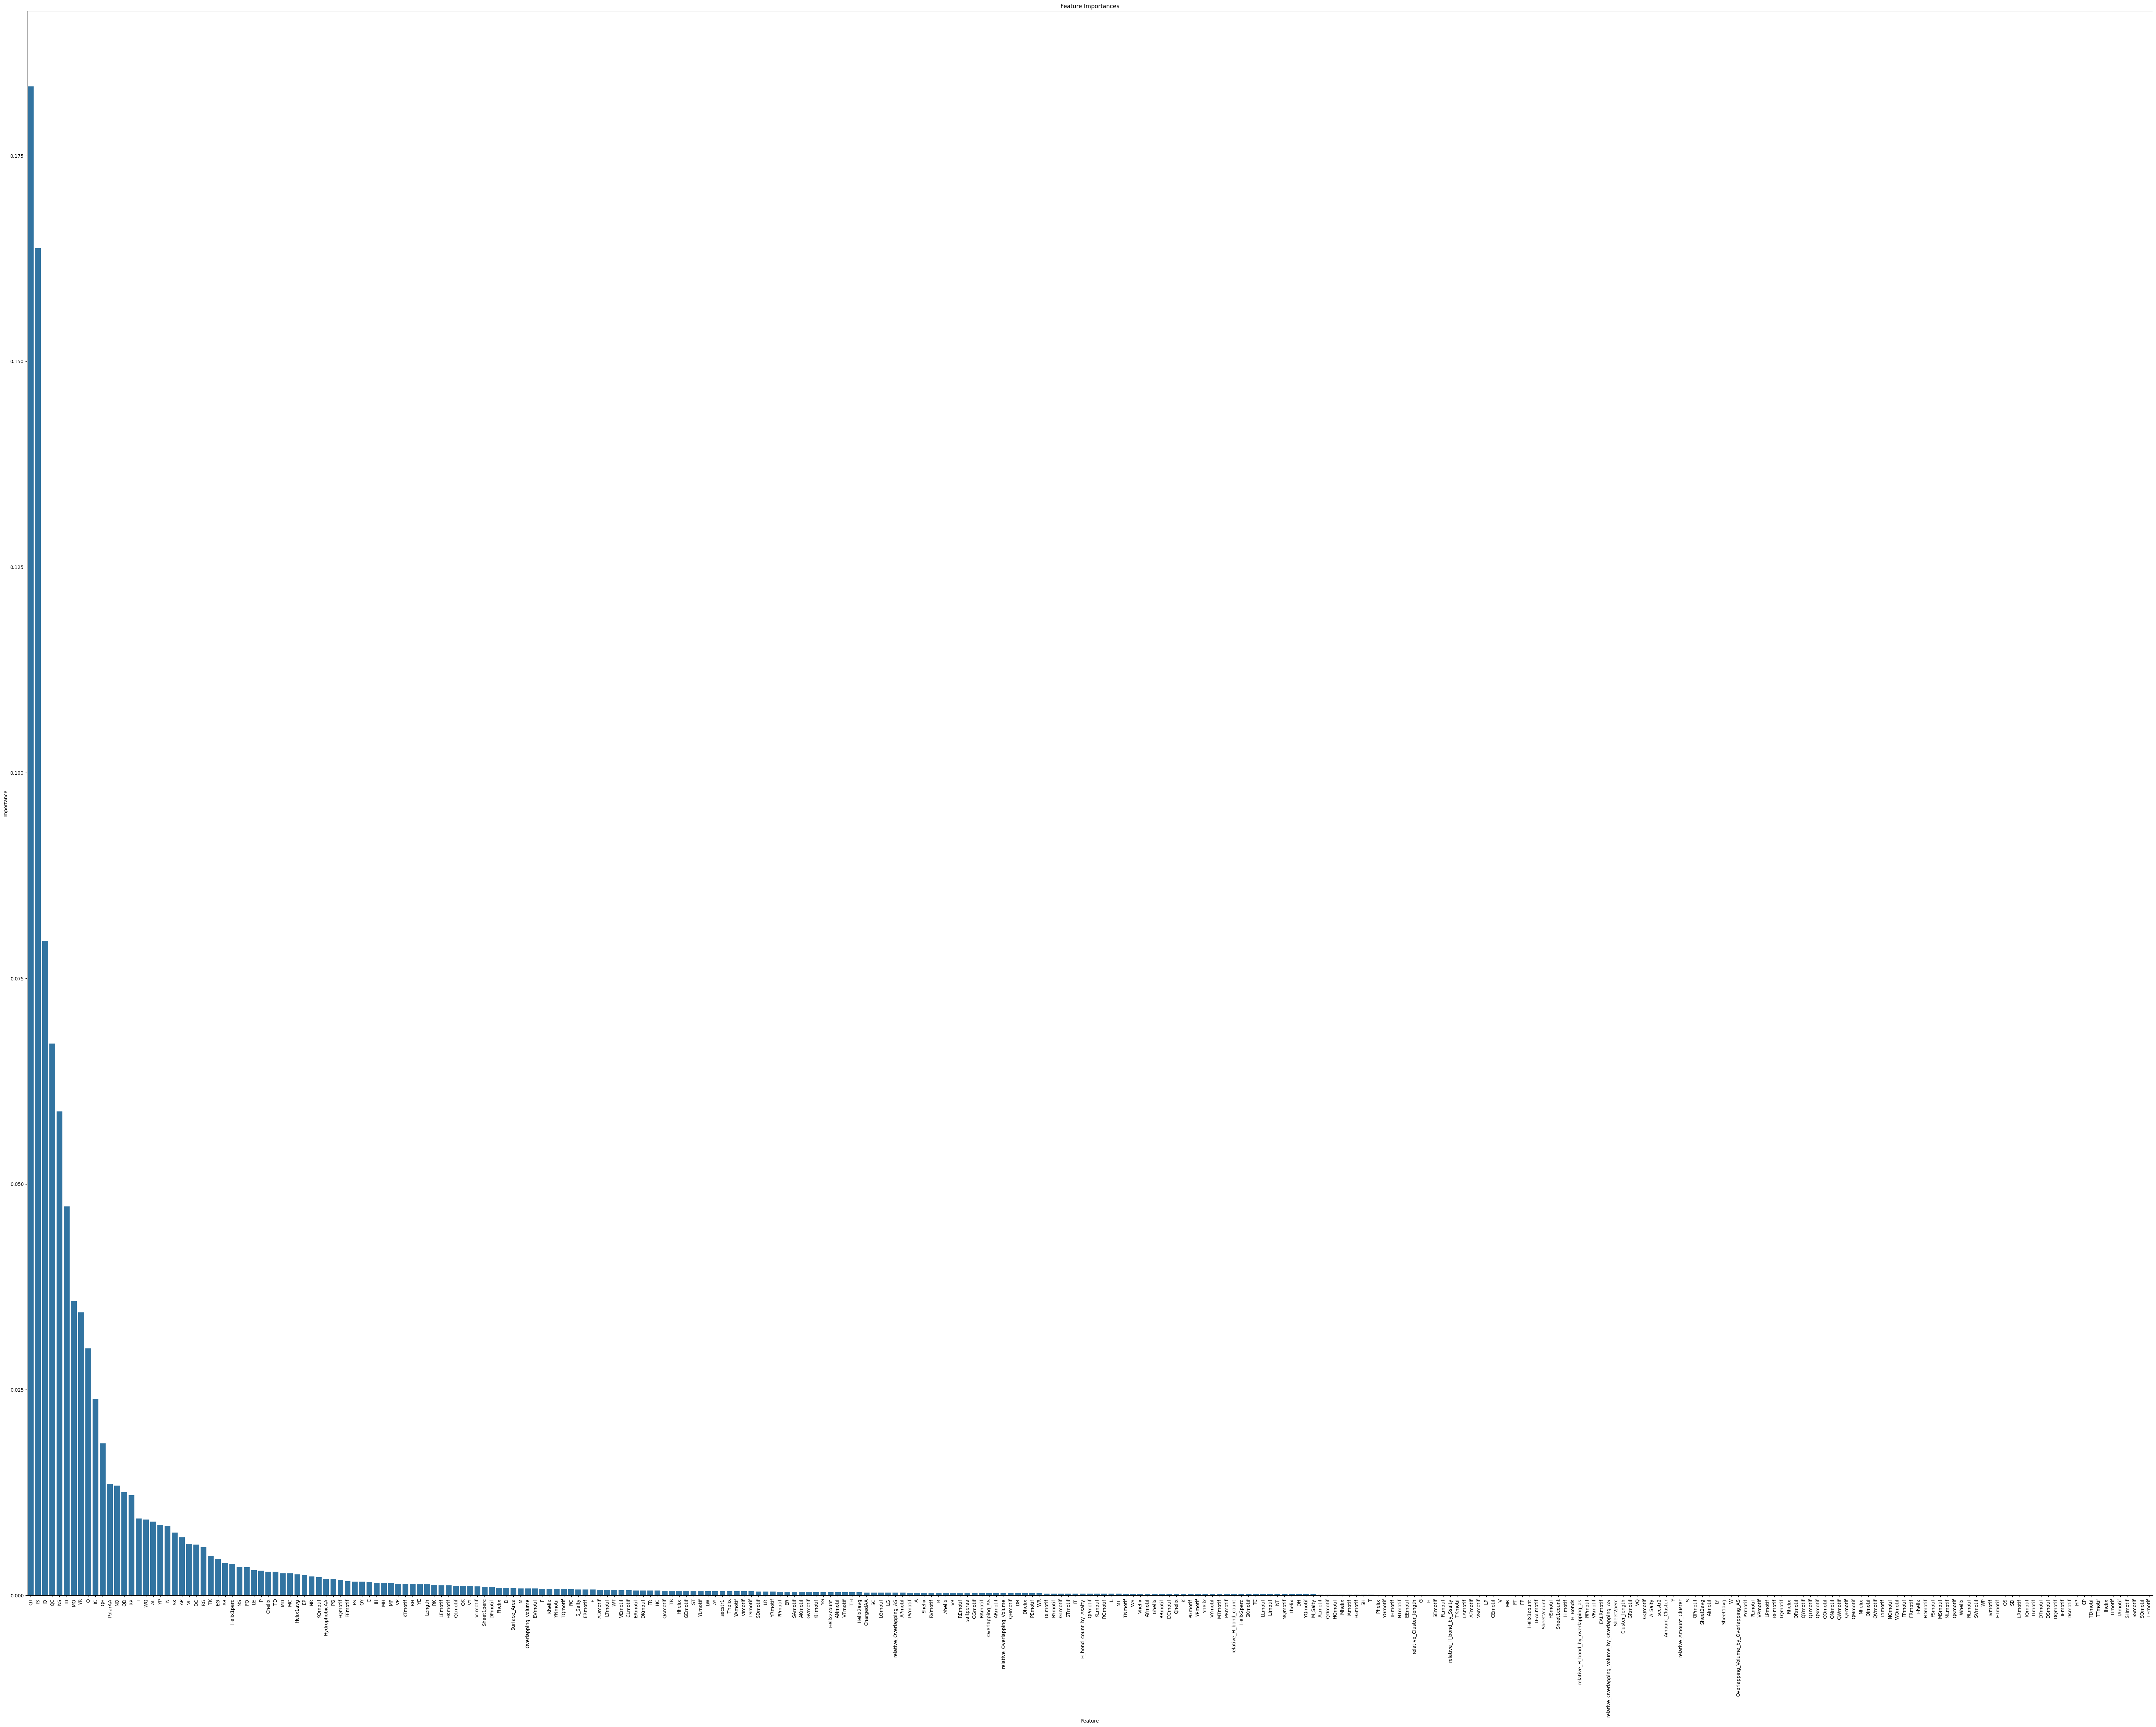

In [13]:
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': gbr.feature_importances_
}).sort_values(by='Importance', ascending=False)
plt.figure(figsize=(80, 60))
sns.barplot(x='Feature', y='Importance', data=feature_importances)
plt.title('Feature Importances')
plt.xticks(rotation=90)
plt.show()